In [2]:
%run iteration_01_0_imports.ipynb

In [3]:
%run iteration_01_0_parameters.ipynb

In [4]:
%run iteration_01_0_utils.ipynb

In [5]:
DATE_TIME = "2021-11-18_20-39-00"

'\nPATH_SAMPLE = "data/sample"\nHEALTHY = "H"\nSICK = "S"\nIMG_SIZE = 400\n'

# Production

## make X

In [6]:
PATH_DATA_SAMPLE

'../data/sample'

In [7]:
DATE_TIME

'2021-11-18_20-39-00'

In [11]:
IMG_SIZE

400

In [13]:
IMG_IN_COLOR = 1
def positive_global_std(path_img: str) -> np.array:
    img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)
    mean = img_arr.mean()
    std  = img_arr.std()
    img_arr_std = (img_arr - mean) / std
    
    # clip les valeurs
    img_arr_std = np.clip(img_arr_std, -1.0, 1.0)
    
    # shift to 0--1
    img_arr_std = (img_arr_std + 1.0) / 2.0
    
    return img_arr_std

In [14]:
path_img = "../cell_images/Parasitized\\C59P20thinF_IMG_20150803_112858_cell_163.png"
img_arr = positive_global_std(path_img)
# padding
img_arr_padded = np.zeros((IMG_SIZE, IMG_SIZE, 3))
img_arr_padded[:img_arr.shape[0],:img_arr.shape[1],:] = img_arr

In [16]:
clf = pickel_read(PATH_MODEL + "/" + "model_rf.pkl")

In [17]:
clf

RandomForestClassifier(random_state=0)

In [28]:
not_seen = img_arr_padded.ravel().reshape((1, np.shape(img_arr_padded.ravel())[0]))

In [29]:
np.shape(not_seen)

(1, 480000)

In [30]:
clf.predict(not_seen)

array(['S'], dtype='<U1')

* Image travaillée

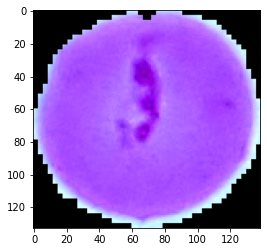

In [34]:
plt.imshow(img_arr)

* Image travaillée padée

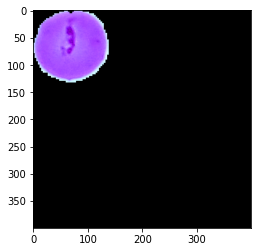

In [31]:
plt.imshow(img_arr_padded)

* Image d'origine

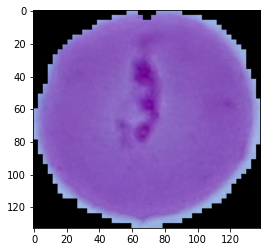

In [33]:
plt.imshow(cv2.imread(path_img))